# **TIỀN XỬ LÝ** 

## Các bước thực hiện:
 - Kiểm tra và tiền xử lý output 
 - Tách dữ liệu thành 3 tập: train, validaton, test.
 - Tiến hành tiền xử lý
 - Mô hình hoá


In [1]:
# IMPORT THƯ VIỆN
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

## Khám phá dữ liệu (đủ để có thể xác định câu hỏi)

In [2]:
pd.set_option('display.max_columns', None)  # Xem tất cả các cột

data = pd.read_csv('HOUSEs_info.csv', sep = '\t')
data.head()

,Loại hình,Phòng ngủ,Phòng tắm,Diện tích,Tình hình nội thất,Dự án,Tháp,Giá bán,Ban công,Phòng cho giúp việc,Sân vườn,Phòng giải trí,Chỗ đậu xe hơi,Hồ bơi riêng,Quầy minibar,Tầng hầm,Góc làm việc,Nhà kho,Nuôi thú cưng,Gym,Bàn ghế phòng khách,Kệ TV,Bộ bàn ăn và ghế,Đảo bếp,Đèn trang trí,Bếp ướt,Bếp khô,Tủ bếp trên,Tủ bếp dưới,Sàn gỗ,Tủ âm tường,Tủ treo đồ / tủ quần áo,Tủ kê đầu giường,Đèn trần,Đèn bàn,Giường,"Đệm, chăn, gối",Tủ giày dép,Bồn tắm,Kệ sách,Bàn làm việc,Bàn trang điểm,TV,Máy hút mùi,Cảm biến cháy,Tủ lạnh,"Bếp ga, bếp từ",Máy giặt,Máy sấy,Dàn phơi đồ thông minh,Máy lạnh,Máy nước nóng,Khóa cửa thẻ từ,Khóa cửa mật khẩu,Khóa cửa vân tay,Thiết bị âm thanh,Smart Home,Lò nướng,Lò vi sóng,Camera an ninh,Internet,Truyền hình cáp,Số tầng,Diện tích sử dụng,Loại chủ quyền,Trạng thái,Thời gian bắt đầu bán,Mã nhà đất,Giá đăng,Loại hình nhà đất,Số phòng ngủ,Số phòng tắm,Hướng cửa,Hướng ban công,Tình trạng nội thất,Ngày Đăng,Tủ bếp trên\n,Thời gian Xây dựng,Chiều dài,Chiều rộng,Diện tích sàn,Mục đích sử dụng,Giường\n,Tủ bếp dưới\n,Đảo bếp\n,Q2 Thảo Điền,Căn hộ cao cấp quận 2,Chủ đầu tư Singapore Thảo Điền,Căn hộ Thảo Điền,Căn hộ hạng sang,Căn hộ view sông,Đầy đủ vệ sinh,Kệ bếp,Hoàn thiện cơ bản,Rèm,Nhà trống,Đèn,Điện,sàn,tường,tủ âm,Mặt tiền chợ,Hẻm Xe Hơi,Căn Hộ Era Town,Era Town quận 7,căn hộ,căn hộ quận 7,căn hộ cần bán,Hồ bơi tràn,Khu tiệc nướng BBQ,Vườn tiểu cảnh,khuôn viên đi dạo,Khu vui chơi trẻ em,Giếng trời,Gác Lửng,Quạt trần hàng Ngoại,Hồ cá,3 máy lạnh,1 phòng thờ,1 sân phơi
0,Căn hộ,3.0,2.0,83.15 m²,Đầy đủ nội thất,Sunrise Riverside,G1,4.19 tỷ,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Căn hộ,1.0,1.0,53.2 m²,Nội thất cơ bản,Q7 Saigon Riverside,MERCURY,1.87 tỷ,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,24.0,53.2 m²,HĐ mua bán,Chưa bàn giao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Căn hộ,3.0,2.0,105.8 m²,Nội thất cơ bản,Vinhomes Central Park,NaN,6.5 tỷ,Yes,No,No,No,Yes,Yes,No,No,Yes,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,NaN,NaN,NaN,11/10/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Căn hộ,2.0,2.0,106.1 m²,Nội thất cơ bản,Sunrise City,NaN,4.25 tỷ,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NaN,106.1 m²,Sổ hồng,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Căn hộ,2.0,1.0,60 m²,Đầy đủ nội thất,Vinhomes Grand Park,S2.05,2.65 tỷ,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,11.0,60 m²,HĐ mua bán,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [3]:
data.shape

(7154, 120)

## Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Quan sát sơ bộ dữ liệu ta thấy mỗi dòng chứa thông tin của một ngôi nhà, và có vẻ không có vấn đề các dòng có ý nghĩa khác nhau.

### Dữ liệu có các dòng bị lặp không?

In [4]:
data.index.duplicated().sum()

0

## Đưa ra câu hỏi cần trả lời
*Output - Giá bán -* được tính từ *input - các thông tin của hành khách -* theo công thức nào?
 Trong đồ án này, ý nghĩa thực tế của việc đi tìm câu trả lời cho câu hỏi trên giúp người dùng có được 1 sự tham khảo với 1 độ chính xác cụ thể về giá nhà dựa trên các thông tin. Qua đó, người dùng có thể dựa trên dự đoán để tự đưa ra quyết định về việc mua (bán) nhà với một mức giá hợp lý.  


## Khám phá dữ liệu 
### 1. OUTPUT TRƯỚC KHI TIỀN XỬ LÝ

In [5]:
# Cột output hiện có kiểu dữ liệu gì?
data['Giá bán'].dtype

dtype('O')

In [6]:
# Cột output có giá trị thiếu không?
data['Giá bán'].isna().sum()

396

#### TIỀN XỬ LÝ OUTPUT

In [7]:
# Xoá ouput có giá trị thiếu
data = data[data['Giá bán'].notna()]
data['Giá bán'].isna().sum()
data = data.reset_index(drop = True) 

In [8]:
# Chuẩn hoá về dạng số

# Vị trí các số hảng tỷ
mil_index = [] 
# Vị trí các số hảng triệu
bil_index = []

for i in range(0, data.shape[0]):
    value = data['Giá bán'][i] 
    if 'tỷ' in value:
        data.at[i, 'Giá bán'] = value.rstrip(' tỷ')
        bil_index.append(i)
    elif 'tr' in value:
        data.at[i, 'Giá bán'] = value.rstrip(' tr')
        mil_index.append(i)

In [9]:
# Chuyển đơn vị triệu thành triệu (đồng)
data['Giá bán'] = data['Giá bán'].astype(float)
for i in bil_index:
    data.at[i, 'Giá bán'] = data['Giá bán'][i] * 100
data['Giá bán'] = data['Giá bán'].astype(int)

### 2. SAU KHI TIỀN XỬ LÝ OUTPUT

In [10]:
# Cột output hiện có kiểu dữ liệu gì?
data['Giá bán'].dtype

dtype('int32')

In [11]:
# Cột output có giá trị thiếu không?
data['Giá bán'].isna().sum()

0

## Tiền xử lý (tách các tập)
  - Ta tách các tập từ dữ liệu thu thập được thành 3 tập: train, validation và test theo tỉ lệ: 70%:15%:15%

In [12]:
# Tách X và y
y_sr = data['Giá bán'] # sr là viết tắt của series
X_df = data.drop("Giá bán", axis=1)

In [13]:
# Tách theo tỉ lệ: 7:1.5:1.5
# Tách dữ liệu thu thập thành 2 tập: tập huấn luyện và tập other (validation và test) theo tỉ lệ 70%:30%
train_X_df, other_X_df, train_y_sr, other_y_sr = train_test_split(X_df, y_sr, test_size=0.3, random_state=0)

# Tách tập other (validation và test) thành 2 tập: tập validation và tập test theo tỉ lệ 50%:50% (tức: bằng 15%:15% so với dữ liệu ban đầu)
val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(other_X_df, other_y_sr, test_size=0.5, random_state=0)

train_X_df.shape, val_X_df.shape, test_X_df.shape, train_y_sr.shape, val_y_sr.shape, test_y_sr.shape


((4730, 119), (1014, 119), (1014, 119), (4730,), (1014,), (1014,))

## Khám phá dữ liệu (tập huấn luyện)

In [14]:
train_X_df.dtypes

Loại hình                object
Phòng ngủ               float64
Phòng tắm               float64
Diện tích                object
Tình hình nội thất       object
                         ...   
Quạt trần hàng Ngoại     object
Hồ cá                    object
3 máy lạnh               object
1 phòng thờ              object
1 sân phơi               object
Length: 119, dtype: object

In [15]:
train_X_df.dtypes[train_X_df.dtypes != object]

Phòng ngủ    float64
Phòng tắm    float64
Số tầng      float64
dtype: object

In [16]:
int_num_cols = ['Phòng ngủ', 'Phòng tắm', 'Số tầng']
float_num_cols = []

In [17]:
# Các cột dạng số
df = train_X_df[int_num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,Phòng ngủ,Phòng tắm,Số tầng
missing_ratio,2.0,2.4,47.6
min,0.0,1.0,1.0
lower_quartile,2.0,1.0,3.0
median,2.0,2.0,9.0
upper_quartile,2.0,2.0,17.0
max,31.0,32.0,44.0


In [18]:
# Các cột không phải dạng số

cat_cols = list(set(train_X_df.columns) - set(int_num_cols))
df = train_X_df[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])


,Mã nhà đất,Nuôi thú cưng,Sân vườn,Máy hút mùi,Trạng thái,căn hộ,Camera an ninh,Quầy minibar,căn hộ quận 7,Máy lạnh,Máy sấy,Khu vui chơi trẻ em,Căn hộ hạng sang,Tủ bếp dưới\n,Ngày Đăng,Nhà trống,Căn hộ view sông,Đèn,Khóa cửa thẻ từ,Góc làm việc,Phòng giải trí,căn hộ cần bán,Rèm,Khu tiệc nướng BBQ,Era Town quận 7,Khóa cửa mật khẩu,Điện,Đèn trần,Loại hình nhà đất,Tình trạng nội thất,"Bếp ga, bếp từ",Thời gian Xây dựng,Hồ bơi tràn,Quạt trần hàng Ngoại,Hướng cửa,Giếng trời,Tủ treo đồ / tủ quần áo,Khóa cửa vân tay,Bàn làm việc,Đèn bàn,Bếp khô,Hoàn thiện cơ bản,Căn hộ Thảo Điền,Vườn tiểu cảnh,Phòng cho giúp việc,Dự án,Tầng hầm,Internet,Bồn tắm,tường,Diện tích sàn,Kệ bếp,Loại chủ quyền,Bộ bàn ăn và ghế,Mặt tiền chợ,Thời gian bắt đầu bán,Hướng ban công,1 phòng thờ,Ban công,Hồ bơi riêng,Gym,sàn,Tình hình nội thất,Tủ âm tường,Nhà kho,3 máy lạnh,Máy giặt,1 sân phơi,Mục đích sử dụng,Bàn ghế phòng khách,Cảm biến cháy,Chủ đầu tư Singapore Thảo Điền,tủ âm,Giường,Số phòng tắm,Q2 Thảo Điền,Bàn trang điểm,Đảo bếp,Lò nướng,Chiều rộng,Số phòng ngủ,Diện tích sử dụng,Đầy đủ vệ sinh,Căn hộ cao cấp quận 2,Tủ bếp dưới,TV,Tủ lạnh,Gác Lửng,Dàn phơi đồ thông minh,Tủ giày dép,Tủ kê đầu giường,Kệ TV,khuôn viên đi dạo,Giá đăng,Căn Hộ Era Town,Chiều dài,Truyền hình cáp,Tủ bếp trên,Smart Home,Đèn trang trí,Lò vi sóng,"Đệm, chăn, gối",Tháp,Máy nước nóng,Giường\n,Thiết bị âm thanh,Tủ bếp trên\n,Đảo bếp\n,Sàn gỗ,Loại hình,Chỗ đậu xe hơi,Diện tích,Kệ sách,Hồ cá,Bếp ướt,Hẻm Xe Hơi
missing_ratio,100,0,0,0,78.7,100,0,0,100,0,0,100,100,99.7,100,100,100,100,0,0,0,100,100,100,100,0,100,2,100,100,0,95.4,100,100,100,100,2,0,2,2,2,100,100,100,0,18.2,0,0,2,100,99.3,100,28.5,2,100,85.5,100,100,0,0,0,100,4.7,2,0,100,0,100,94.3,2,0,100,100,2.4,100,100,2,2.3,0,98.8,100,18.3,100,100,2.3,0,0,100,0,2,2,2,100,100,100,98.8,0,2.2,0,2,0,2,53.3,0,99.5,0,99.7,99.6,2,0,0,0.7,2,100,2,100
num_values,0,2,2,2,1,1,2,2,1,2,2,0,1,1,0,1,1,0,2,2,2,1,1,0,1,2,0,2,0,0,2,31,0,0,0,0,2,2,2,2,2,1,1,0,2,351,2,2,2,0,32,1,4,2,1,396,0,0,2,2,2,0,3,2,2,0,2,0,23,2,2,1,0,2,0,1,2,2,2,17,0,1019,1,1,2,2,2,0,2,2,2,2,0,0,1,23,2,2,2,2,2,2,227,2,2,2,1,1,2,14,2,1140,2,0,2,1
value_ratios,{},"{'No': 96.5, 'Yes': 3.5}","{'No': 97.6, 'Yes': 2.4}","{'No': 99.1, 'Yes': 0.9}",{'Chưa bàn giao': 100.0},{'Yes': 100.0},"{'No': 99.0, 'Yes': 1.0}","{'No': 99.3, 'Yes': 0.7}",{'Yes': 100.0},"{'No': 97.9, 'Yes': 2.1}","{'No': 99.7, 'Yes': 0.3}",{},{'Yes': 100.0},{'No': 100.0},{},{'Yes': 100.0},{'Yes': 100.0},{},"{'No': 99.1, 'Yes': 0.9}","{'No': 93.7, 'Yes': 6.3}","{'No': 97.0, 'Yes': 3.0}",{'Yes': 100.0},{'Yes': 100.0},{},{'Yes': 100.0},"{'No': 99.3, 'Yes': 0.7}",{},"{'No': 98.6, 'Yes': 1.4}",{},{},"{'No': 98.8, 'Yes': 1.2}","{'01/01/2016': 19.6, '01/01/2015': 16.4, '01/0...",{},{},{},{},"{'No': 91.1, 'Yes': 8.9}","{'No': 99.4, 'Yes': 0.6}","{'No': 95.2, 'Yes': 4.8}","{'No': 99.5, 'Yes': 0.5}","{'No': 98.6, 'Yes': 1.4}",{'Yes': 100.0},{'Yes': 100.0},{},"{'No': 99.3, 'Yes': 0.7}","{'Vinhomes Grand Park': 16.1, 'Vinhomes Centra...","{'No': 96.6, 'Yes': 3.4}","{'No': 91.8, 'Yes': 8.2}","{'No': 99.4, 'Yes': 0.6}",{},"{'160 m²': 8.8, '2,047.4 m²': 2.9, '624.59 m²'...",{'Yes': 100.0},"{'HĐ mua bán': 72.6, 'Sổ hồng': 25.4, 'Sổ đỏ':...","{'No': 92.3, 'Yes': 7.7}",{'Yes': 100.0},"{'28/09/2020': 1.9, '16/12/2020': 1.5, '07/12/...",{},{},"{'No': 87.7, 'Yes': 12.3}","{'No': 91.4, 'Yes': 8.6}","{'No': 90.2, 'Yes': 9.8}",{},"{'Nội thất cơ bản': 39.2, 'Đầy đủ nội thất': 3...","{'No': 98.9, 'Yes': 1.1}","{'No': 98.9, 'Yes': 1.1}",{},"{'No': 98.7, 'Yes': 1.3}",{},"{'để ở hoặc cho thuê': 30.1, 'Ở': 23.0, 'Để ở'...","{'No': 91.9, 'Yes': 8.1}","{'No': 99.3, 'Yes': 0.7}",{'Yes': 100.0},{},"{'No': 92.3, 'Yes': 7.7}",{},{'Yes': 100.0},"{'No': 95.9, 'Yes': 4.1}","{'No': 99.8, 'Yes': 0.2}","{'No': 99.6, 'Yes': 0.4}","{'4 m': 26.8, '5 m': 14.3, '10 m': 12.5, '8 m'...",{},"{'54 m²': 3.1, '63 m²': 3.0, '65 m²': 2.0, '75...",{'Yes': 100.0},{'Yes': 100.0},"{'No': 98.0, 'Yes': 2.0}","{'No': 98.4, 'Yes': 1.6}","{'No': 98.3, 'Yes': 1.7}",{},"{'No': 99.5, 'Yes': 0.5

In [19]:
# liệt kê các tập có độ missing values >= 50% và có độ lệch dữ liệu > 95% (đối với cate Yes, No)
dropped_cols = []
for i in range(0, df.shape[1]):
    if df.agg(missing_ratio)[i] >= 50:
#         print('Missing: ', df.columns.values[i], df.agg(missing_ratio)[i])
        dropped_cols.append(df.columns.values[i])
        
    elif 'Yes' in df.agg(value_ratios)[i] or 'No' in df.agg(value_ratios)[i]:
        if df.agg(value_ratios)[i]['Yes'] > 99.0 or df.agg(value_ratios)[i]['No'] > 95.0:
#             print('Values > 99: ', df.columns.values[i], df.agg(value_ratios)[i])
            dropped_cols.append(df.columns.values[i])

len(dropped_cols)

99

array([[<AxesSubplot:title={'center':'Giá bán'}>,
        <AxesSubplot:title={'center':'Phòng ngủ'}>],
       [<AxesSubplot:title={'center':'Phòng tắm'}>,
        <AxesSubplot:title={'center':'Số tầng'}>]], dtype=object)

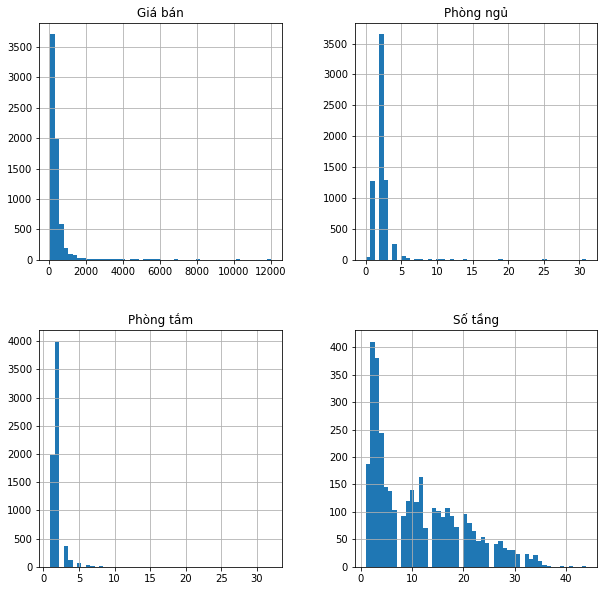

In [20]:
data.hist(bins=50, figsize=(10, 10))

## Tiền xử lý (tập huấn luyện)

    Ta tiến hành tiền xử lý như sau:
       * Xoá đi những cột có độ missing values > 50% và có độ lệch dữ liệu > 99%
       * Chuyển các cột dạng số nhưng lại ở dạng chuỗi về lại dạng số ('Diệc tích', 'Diện tích sử dụng')
       * Xoá cột dự án

In [21]:
# Hàm chuyển các cột dạng số nhưng lại ở dạng chuỗi về lại dạng số
def ConVert2Num(df, array):
    '''
    Input : df, Categorical Column Name Array
    Output: Numeric Columns
    '''
    
    for j in array:
        for i in range(0, df.shape[0]):
            index = df.index[i]
            temp = df[j][index] 

            if pd.isna(temp) == False:
                if 'm²' in temp:
                    df.at[index, j] = temp.replace(',', '').rstrip(' m²')
                    
        df[j] = df[j].astype(float)
    
    return df

#Hàm chuyển cột số tầng từ float sang int
def Convert2Int(df, array):
    '''
    Input : df, Float Column Name Array
    Output: Int Columns
    '''
    
    for i in array:
        df[i] = df[i].fillna(value = -1)
        df[i] = df[i].astype(int)
        df[i] = df[i].replace(-1, np.nan)
    return df

In [22]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_Loai_hinh=1):
        self.num_top_Loai_hinh = num_top_Loai_hinh

    def fit(self, X_df, y=None):
        Loai_hinh_col = X_df['Loại hình']
        self.Loai_hinh_counts_ = Loai_hinh_col.value_counts()
        Loai_hinh = list(self.Loai_hinh_counts_.index)
        self.top_Loai_hinh_ = Loai_hinh[:max(1, min(self.num_top_Loai_hinh, len(Loai_hinh)))]

        return self
    def transform(self, X_df, y=None):
        # YOUR CODE HERE
        df = X_df.copy()
        Loai_hinh_col = df["Loại hình"] 
        Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
        df["Thuộc loại hình"] = Loai_hinh_col
        
        dropped_cols.extend(('Loại hình', 'Dự án'))
        df.drop(dropped_cols, axis=1, inplace=True)
        
        # Điền thiếu cho cột 'Diện tích sử dụng' sao cho có giá trị < cột diện tích
        for i in range(0, df.shape[0]):
            index = df.index[i]
            temp = df['Diện tích sử dụng'][index] 

            if pd.isna(temp) == True:
                df.at[index, 'Diện tích sử dụng'] = df['Diện tích'][index]     
            
        to_float_arr = ['Diện tích', 'Diện tích sử dụng']
        ConVert2Num(df, to_float_arr)
        
        Convert2Int(df, int_num_cols)
        
        return df

In [23]:
# TEST FIT METHOD
col_adderdropper = ColAdderDropper(num_top_Loai_hinh=4)
col_adderdropper.fit(train_X_df)
print(col_adderdropper.Loai_hinh_counts_)
print()
print(col_adderdropper.top_Loai_hinh_)
print()


Căn hộ                 3811
Nhà phố                 583
Office-tel              173
Đất nền                  39
Shophouse                38
Biệt thự                 27
Penthouse                23
Văn phòng                20
Căn hộ dịch vụ            6
Loại khác                 4
Lofthouse                 3
Đất công nghiệp           1
Nhà xưởng kho bãi         1
Mặt bằng kinh doanh       1
Name: Loại hình, dtype: int64

['Căn hộ', 'Nhà phố', 'Office-tel', 'Đất nền']



In [24]:
after_train_transform_df = col_adderdropper.transform(train_X_df)
print(after_train_transform_df.shape)
after_train_transform_df

<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'


(4730, 19)


,Phòng ngủ,Phòng tắm,Diện tích,Tình hình nội thất,Ban công,Chỗ đậu xe hơi,Hồ bơi riêng,Góc làm việc,Gym,Bàn ghế phòng khách,Bộ bàn ăn và ghế,Tủ treo đồ / tủ quần áo,Giường,Internet,Truyền hình cáp,Số tầng,Diện tích sử dụng,Loại chủ quyền,Thuộc loại hình
4819,2.0,2.0,69.20,Đầy đủ nội thất,No,No,No,No,No,No,No,No,No,No,No,9.0,63.40,HĐ mua bán,Căn hộ
1216,1.0,1.0,30.40,Nội thất cơ bản,No,No,No,No,No,No,No,No,No,No,No,22.0,27.70,HĐ mua bán,Office-tel
6556,3.0,2.0,77.00,Đầy đủ nội thất,No,No,No,No,No,No,No,No,No,No,No,4.0,77.00,NaN,Căn hộ
1393,2.0,2.0,58.30,Không có nội thất,No,No,No,No,No,No,No,No,No,No,No,9.0,53.30,HĐ mua bán,Căn hộ
5615,2.0,2.0,72.00,Đầy đủ nội thất,No,No,No,No,No,No,No,No,No,No,No,10.0,72.00,NaN,Căn hộ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2.0,2.0,67.61,Nội thất cơ bản,No,No,No,No,No,No,No,No,No,No,No,32.0,67.61,HĐ mua bán,Căn hộ
3264,2.0,2.0,74.34,Không có nội thất,No,No,No,No,No,No,No,No,No,No,No,NaN,68.02,HĐ mua bán,Căn hộ
1653,5.0,6.0,42.00,Nội thất cơ bản,No,No,No,No,No,No,No,No,No,No,No,4.0,145.00,Sổ hồng,Nhà phố
2607,2.0,2.0,77.00,Không có nội thất,No,No,No,No,No,No,No,No,No,No,No,NaN,71.00,Sổ hồng,Căn hộ


In [25]:
after_train_transform_df.agg([missing_ratio, num_values, value_ratios])

,Phòng ngủ,Phòng tắm,Diện tích,Tình hình nội thất,Ban công,Chỗ đậu xe hơi,Hồ bơi riêng,Góc làm việc,Gym,Bàn ghế phòng khách,Bộ bàn ăn và ghế,Tủ treo đồ / tủ quần áo,Giường,Internet,Truyền hình cáp,Số tầng,Diện tích sử dụng,Loại chủ quyền,Thuộc loại hình
missing_ratio,2,2.4,0.7,4.7,0,0,0,0,0,2,2,2,2.4,0,0,47.6,0,28.5,0
num_values,17,16,1140,3,2,2,2,2,2,2,2,2,2,2,2,39,1209,4,5
value_ratios,"{2.0: 55.3, 3.0: 19.3, 1.0: 19.1, 4.0: 3.7, 5....","{2.0: 60.7, 1.0: 29.9, 3.0: 5.4, 4.0: 1.7, 5.0...","{59.0: 3.1, 69.0: 2.3, 70.0: 1.9, 75.0: 1.7, 7...","{'Nội thất cơ bản': 39.2, 'Đầy đủ nội thất': 3...","{'No': 87.7, 'Yes': 12.3}","{'No': 88.9, 'Yes': 11.1}","{'No': 91.4, 'Yes': 8.6}","{'No': 93.7, 'Yes': 6.3}","{'No': 90.2, 'Yes': 9.8}","{'No': 91.9, 'Yes': 8.1}","{'No': 92.3, 'Yes': 7.7}","{'No': 91.1, 'Yes': 8.9}","{'No': 92.3, 'Yes': 7.7}","{'No': 91.8, 'Yes': 8.2}","{'No': 93.1, 'Yes': 6.9}","{2.0: 11.6, 3.0: 10.6, 4.0: 6.7, 1.0: 5.3, 12....","{54.0: 2.6, 63.0: 2.5, 65.0: 1.9, 75.0: 1.8, 7...","{'HĐ mua bán': 72.6, 'Sổ hồng': 25.4, 'Sổ đỏ':...","{'Căn hộ': 80.6, 'Nhà phố': 12.3, 'Office-tel'..."


- Đến đây, các cột dạng số (numerical) gồm: "Phòng ngủ", "Phòng tắm", "Số tầng", "Diện tích", "Diện tích sử dụng". Các cột không phải dạng số (categorical) và không có thứ tự gồm: 57 cột bên dưới. Các bước tiền xử lý tiếp theo như sau:

    - Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị mean của cột (gợi ý: dùng SimpleImputer trong Sklearn). Với tất cả các cột dạng số trong tập huấn luyện, ta đều cần tính mean, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
    - Với các cột không phải dạng số và không có thứ tự:
        - Ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột (gợi ý: dùng SimpleImputer trong Sklearn). Với tất cả các cột không có dạng số và không có thứ tự, ta đều cần tính mode, vì ta không biết được cột nào sẽ bị thiếu giá trị khi dự đoán với các véc-tơ input mới.
        - Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot (gợi ý: dùng OneHotEncoder trong Sklearn, để ý tham số handle_unknown vì khi dự đoán với các véc-tơ input mới ...).

- Cuối cùng, khi tất cả các cột đã được điền giá trị thiếu và đã có dạng số, ta sẽ tiến hành chuẩn hóa bằng cách trừ đi mean và chia cho độ lệch chuẩn của cột để giúp cho các thuật toán cực tiểu hóa như Gradient Descent, LBFGS, ... hội tụ nhanh hơn (gợi ý: dùng StandardScaler trong Sklearn).
- Nhiệm vụ: tạo ra một pipeline, đặt tên là preprocess_pipeline, bao gồm: bước thêm cột 'Diện tích', 'Diện tích sử dụng' và bỏ các cột (đã cài ở class ColAdderDropper, để num_top_Loai_hinh=4), và tất cả các bước ở đây. Sau khi tạo ra được pipeline này rồi, bạn sẽ gọi phương thức fit_transform với đầu vào là train_X_df để tính các giá trị từ tập huấn luyện và đồng thời tiền xử lý train_X_df; kết quả trả về sẽ là train_X_df sau khi đã tiền xử lý, là một mảng Numpy, bạn đặt tên là preprocessed_train_X. 

In [26]:
# CÁC CỘT DẠNG SỐ kiểu float
float_num_cols.extend(('Diện tích', 'Diện tích sử dụng'))
float_num_cols

['Diện tích', 'Diện tích sử dụng']

In [27]:
# CỘT KHÔNG PHẢI DẠNG SỐ
cate_cols = []
for i in after_train_transform_df.columns:
    if i not in int_num_cols and i not in float_num_cols:
        cate_cols.append(i)
#         print(i)
        
# Số lượng cột
len(cate_cols)

14

In [28]:
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')
encoding = OneHotEncoder()
categorical_transformer = make_pipeline(imp_mode, encoding)

colTransform = ColumnTransformer(transformers=[('float_numerical', imp_mean, float_num_cols),
                                                ('int_numerical', imp_median, int_num_cols),
                                               ('categorical', categorical_transformer, cate_cols)])

colNormalize = StandardScaler()
preprocess_pipeline = make_pipeline(col_adderdropper, colTransform, colNormalize)

preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'


In [29]:
preprocess_pipeline


array([[-0.07700753, -0.16834371, -0.1345158 , ..., -0.19484243,
        -0.16407744, -0.09118   ],
       [-0.59819279, -0.49415281, -0.98741091, ...,  5.13235233,
        -0.16407744, -0.09118   ],
       [ 0.02776682, -0.04422595,  0.7183793 , ..., -0.19484243,
        -0.16407744, -0.09118   ],
       ...,
       [-0.44237452,  0.57636281,  2.42416951, ..., -0.19484243,
        -0.16407744, -0.09118   ],
       [ 0.02776682, -0.09898378, -0.1345158 , ..., -0.19484243,
        -0.16407744, -0.09118   ],
       [-0.42894191, -0.35452034, -0.98741091, ..., -0.19484243,
        -0.16407744, -0.09118   ]])

### Tiền xử lý (tập validation và tập test)
 - Một khi đã có preprocess_pipeline với các giá trị (top_Loai_hinh_, mean, mode, ...) đã được tính từ tập huấn luyện, ta có thể dễ dàng dùng phương thức transform để tiền xử lý cho các véc-tơ input mới trong tập validation và tập kiểm tra. 
 - Tiền xử lý cho val_X_df và test_X_df rồi lưu kết quả vào preprocessed_val_X và preprocessed_val_X.

## Tiền xử lý + Mô hình hoá


In [30]:
# Tạo full pipeline
coladderdropper = ColAdderDropper()
imp_mean = SimpleImputer(strategy='mean')
imp_median = SimpleImputer(strategy='median')
imp_mode = SimpleImputer(strategy='most_frequent')
encoding = OneHotEncoder()
categorical_transformer = make_pipeline(imp_mode, encoding)

colTransform = ColumnTransformer(transformers=[('float_numerical', imp_mean, float_num_cols),
                                                ('int_numerical', imp_median, int_num_cols),
                                               ('categorical', categorical_transformer, cate_cols)])
colNormalize = StandardScaler()

mlpclassifier = MLPClassifier(hidden_layer_sizes=(20), activation='identity', solver='adam', random_state=0, max_iter=500)
full_pipeline = make_pipeline(coladderdropper, colTransform, colNormalize, mlpclassifier)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs = []
val_errs = []
alphas = [0.0001, 0.001, 0.01, 0.1, 1]
num_top_Loai_hinh_s = [1, 3, 5, 7, 9]
best_val_err = float('inf'); best_alpha = None; best_num_top_Loai_hinh = None

for alpha in alphas:
    for num_top_Loai_hinh in num_top_Loai_hinh_s:
        full_pipeline.set_params(coladderdropper__num_top_Loai_hinh=num_top_Loai_hinh, mlpclassifier__alpha=alpha)
        full_pipeline.fit(train_X_df, train_y_sr)
        full_pipeline.predict(val_X_df)
        train_score = full_pipeline.score(train_X_df, train_y_sr)
        val_score = full_pipeline.score(val_X_df, val_y_sr)
        train_err, val_err = (1 - train_score) * 100, (1 - val_score) * 100
        train_errs.append(train_err)
        val_errs.append(val_err)
        if best_val_err > val_err:
            best_val_err = val_err
            best_alpha = alpha
            best_num_top_Loai_hinh = num_top_Loai_hinh
'Finish!'

<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = '

<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = '

<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
C:\Users\phamd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a co

<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
C:\Users\phamd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a co

<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = '

'Finish!'

In [31]:
# TEST
full_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_Loai_hinh=9)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('float_numerical',
                                                  SimpleImputer(),
                                                  ['Diện tích',
                                                   'Diện tích sử dụng']),
                                                 ('int_numerical',
                                                  SimpleImputer(strategy='median'),
                                                  ['Phòng ngủ', 'Phòng tắm',
                                                   'Số tầng']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['Tình hình nội thất',
                                                   'Ban công', 'Chỗ đậu xe hơi',
                                                   'Hồ bơi riêng',
                                                   'Góc làm việc', 'Gym',
                                                   'Bàn ghế phòng khách',
                                                   'Bộ bàn ăn và ghế',
                                                   'Tủ treo đồ / tủ quần áo',
                                                   'Giường', 'Internet',
                                                   'Truyền hình cáp',
                                                   'Loại chủ quyền',
                                                   'Thuộc loại hình'])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', alpha=1,
                               hidden_layer_sizes=20, max_iter=500,
                               random_state=0))])

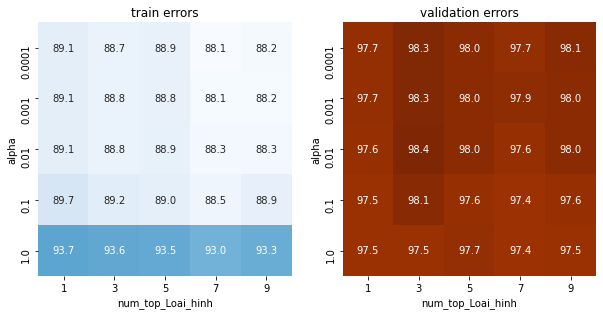

In [32]:
# Trực quan hóa kết quả
train_errs_df = pd.DataFrame(data=np.array(train_errs).reshape(len(alphas), -1),
                             index=alphas, columns=num_top_Loai_hinh_s)
val_errs_df = pd.DataFrame(data=np.array(val_errs).reshape(len(alphas), -1), 
                           index=alphas, columns=num_top_Loai_hinh_s)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Blues')
plt.title('train errors'); plt.xlabel('num_top_Loai_hinh'); plt.ylabel('alpha')
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Oranges')
plt.title('validation errors'); plt.xlabel('num_top_Loai_hinh'); plt.ylabel('alpha');

In [37]:
full_pipeline.set_params(coladderdropper__num_top_Loai_hinh=best_num_top_Loai_hinh, mlpclassifier__alpha=best_alpha)
full_pipeline.fit(train_X_df, train_y_sr)
full_pipeline.fit(val_X_df, val_y_sr)
full_pipeline.fit(test_X_df, test_y_sr)

<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
C:\Users\phamd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'
C:\Users\phamd\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582:

Pipeline(steps=[('coladderdropper', ColAdderDropper(num_top_Loai_hinh=7)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('float_numerical',
                                                  SimpleImputer(),
                                                  ['Diện tích',
                                                   'Diện tích sử dụng']),
                                                 ('int_numerical',
                                                  SimpleImputer(strategy='median'),
                                                  ['Phòng ngủ', 'Phòng tắm',
                                                   'Số tầng']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='mo...
                                                  ['Tình hình nội thất',
                                                   'Ban công', 'Chỗ đậu xe hơi',
                                                   'Hồ bơi riêng',
                                                   'Góc làm việc', 'Gym',
                                                   'Bàn ghế phòng khách',
                                                   'Bộ bàn ăn và ghế',
                                                   'Tủ treo đồ / tủ quần áo',
                                                   'Giường', 'Internet',
                                                   'Truyền hình cáp',
                                                   'Loại chủ quyền',
                                                   'Thuộc loại hình'])])),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(activation='identity', alpha=0.1,
                               hidden_layer_sizes=20, max_iter=500,
                               random_state=0))])

In [67]:
y_test = full_pipeline.predict(test_X_df)
df = pd.DataFrame({test_X_df.index.name: test_X_df.index, 'Price': y_test})
df.to_csv('my_preds.csv',sep = '\t', index = False)

<ipython-input-22-ed354545b5b8>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Loai_hinh_col[~Loai_hinh_col.isin(self.top_Loai_hinh_)] = 'Others'


In [95]:
result = pd.read_csv('my_preds.csv', sep = '\t', index_col = 'Unnamed: 0')
result.shape

(1014, 1)

In [89]:
test_y_sr

2200    325
3519    360
6379    530
3427    630
6191    440
       ... 
1521    180
4034    237
1622    229
2696    670
3658    650
Name: Giá bán, Length: 1014, dtype: int32

In [99]:
# Evaluate
sum_of_score = 0
for i in result.index:
    pre = result['Price'][i]
    real = test_y_sr[i]
    score = abs(real - pre) / real
    sum_of_score += score / (result.shape[0])
    
sum_of_score *= 100  
sum_of_score

25.10159735526435